#### Задача 1: 3 балла

Исследуем варьирование комитмента в зависимости от оператора (отрицания, условия, модального оператора, вопроса) и глагола (*think*, *know*, *believe* etc.). Работаем с [дейтасетом](https://github.com/mcdm/CommitmentBank/blob/master/CommitmentBank-items.csv) английского [CommmitmentBank](https://github.com/mcdm/CommitmentBank/tree/master).

[Hofmann et al. 2023](https://github.com/dashapopova/CompSem2024/blob/main/NLI/Hofmann-etal_SuB28.pdf) исследовали варьирование комитмента в английском в зависимости от оператора (отрицания, условия, модального оператора, вопроса) и предиката и установили, что условный контекст более проективен (чаще сохраняет следствия), чем вопросительный, который, в свою очередь, более проективен, чем контекст отрицания и модального оператора, также они отметили варьирование по предикату.
Ранее Sieker & Solstad 2022 установили, что для немецкого языка контекст отрицания -- самый проективный контекст.

Посчитайте средний рейтинг комитмента по предикату (*think*, *know*, *believe* etc.) и по оператору (modal, negation, conditional, question) из [дейтасета](https://github.com/mcdm/CommitmentBank/blob/master/CommitmentBank-items.csv), приведите релевантный код (1 балл) и постройте график (1 балл), аналогичный Figure 1 в [Hofmann et al. 2023](https://github.com/dashapopova/CompSem2024/blob/main/NLI/Hofmann-etal_SuB28.pdf). Кратко прокомментируйте результат (1 балл): подтвердилась ли на нашем дейтасете гипотеза, что в английском условный контекст более проективен (чаще сохраняет следствия), чем вопросительный, который, в свою очередь, более проективен, чем контекст отрицания и модального оператора?

In [68]:
!wget https://raw.githubusercontent.com/mcdm/CommitmentBank/master/CommitmentBank-items.csv

--2024-03-06 19:12:56--  https://raw.githubusercontent.com/mcdm/CommitmentBank/master/CommitmentBank-items.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 591701 (578K) [text/plain]
Saving to: ‘CommitmentBank-items.csv.1’

CommitmentBank-item 100%[===================>] 577.83K  --.-KB/s    in 0.04s   

2024-03-06 19:12:56 (13.2 MB/s) - ‘CommitmentBank-items.csv.1’ saved [591701/591701]



In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import sem


data = pd.read_csv("CommitmentBank-items.csv")
data.head()

,Unnamed: 0,uID,Verb,Embedding,Context,Target,Prompt,ModalType,MatTense,MatSubjLemma,MatSubjPer,MatSubjNum,Embedding.1,genre,factive,mean.noTarget,sd.noTarget,Mean,SD,Reponses
0,1,BNC-1,admit,conditional,Polly had to think quickly.,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,NaN,future,she,third,singular,conditional,BNC,no,-0.111111,1.269296,2.000000,0.866025,"2, 3, 3, 1, 3, 1, 2, 1, 2"
1,2,BNC-1002,say,modal,"Nevertheless, life went on as it always does. ...",Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,CI,present,it,third,singular,modal,BNC,no,1.200000,1.873796,1.875000,0.834523,"2, 1, 3, 1, 2, 2, 3, 1"
2,3,BNC-1003,say,modal,"He patted her hand. If he had chosen to, Thoma...",He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,AB,present,he,third,singular,modal,BNC,no,-0.250000,0.462910,0.666667,1.154701,"2, 0, 1, 0, 0, 3, -1, 0, 1, 0, 0, 2"
3,4,BNC-1005,say,modal,She could see his distorted image in the slant...,Of course she could say it was for the childre...,it was for the children,AB,future,she,third,singular,modal,BNC,no,0.636364,1.120065,0.875000,0.991031,"2, 1, 0, 1, -1, 1, 1, 2"
4,5,BNC-1006,say,modal,"She glanced around the room, laying her hot fl...",Robyn swallowed and took a deep breath trying ...,it was all right,AB,future,she,third,singular,modal,BNC,no,-1.090909,1.044466,0.000000,2.309401,"3, 1, -2, -3, -3, 3, 2, 1, -1, -1"


In [70]:
operators = ["modal", "negation", "conditional", "question"]
data_filtered = data[data["Embedding.1"].isin(operators)]
verbs_with_all_operators = data_filtered.groupby("Verb").filter(lambda x: x["Embedding.1"].nunique() == len(operators))
len(verbs_with_all_operators)

1009

In [71]:
avg_ratings = verbs_with_all_operators.groupby(["Verb", "Embedding.1"])["Mean"].mean().reset_index()

In [72]:
avg_ratings["SEM"] = verbs_with_all_operators.groupby(["Verb", "Embedding.1"])["Mean"].apply(sem).reset_index(drop=True)

confidence = 1.96
avg_ratings["CI_lower"] = avg_ratings["Mean"] - (avg_ratings["SEM"] * confidence)
avg_ratings["CI_upper"] = avg_ratings["Mean"] + (avg_ratings["SEM"] * confidence)

long_data = avg_ratings.melt(id_vars=["Verb", "Embedding.1"], value_vars=["CI_lower", "Mean", "CI_upper"], var_name="Metric", value_name="Value")

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


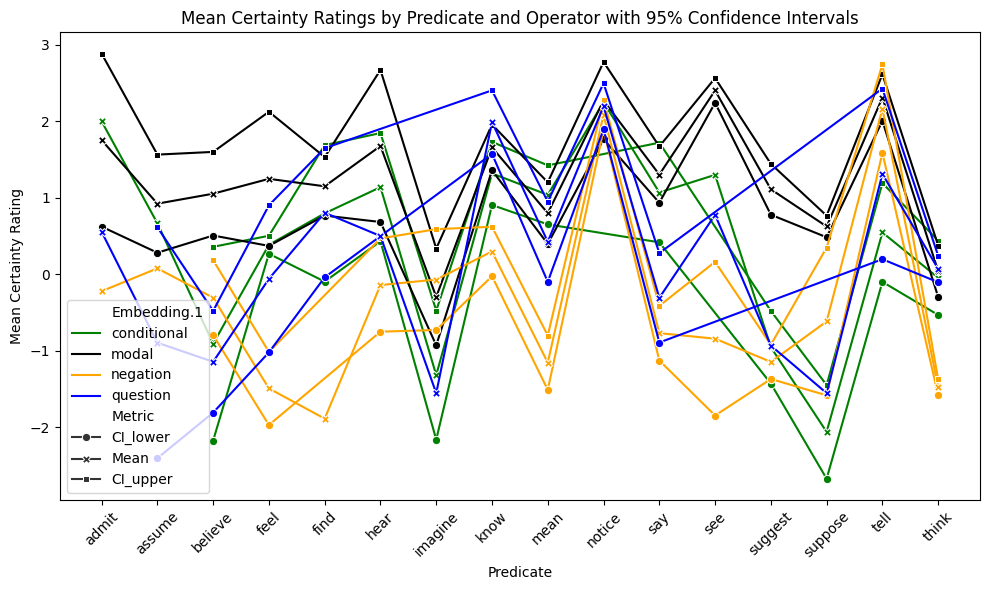

In [73]:
plt.figure(figsize=(10, 6))
palette = {"modal": "black", "negation": "orange", "conditional": "green", "question": "blue"}
sns.lineplot(data=long_data, x="Verb", y="Value", hue="Embedding.1", style="Metric", markers=True, dashes=False, palette=palette)
plt.xticks(rotation=45)
plt.ylabel("Mean Certainty Rating")
plt.xlabel("Predicate")
plt.title("Mean Certainty Ratings by Predicate and Operator with 95% Confidence Intervals")

plt.tight_layout()
plt.show()

In [74]:
operator_averages = avg_ratings.groupby("Embedding.1")["Mean"].mean().reset_index()
operator_averages

,Embedding.1,Mean
0,conditional,0.451104
1,modal,1.252144
2,negation,-0.344412
3,question,0.135997


Что ж, гипотеза не подтвердилась. Условный контекст действительно более проективен, чем вопросительный, а вопросительный - более проективен, чем контекст отрицания. Однако модальный контекст показывает самую высокую, а не самую низкую проективность, как в оригинале.

Я бы сказал, что это связано с небольшим размером датасета (мы не можем адекватно рассмотреть все случаи), а также со спецификой конкретных предикатов. Например, для предикатов типа *say* модальность не понижает рейтинг: *it could be said that ...* ("можно сказать, что ...") - скорее наоборот. В целом "модальность" - очень абстрактный термин, чтобы сводить к нему все операторы, я бы разграничил, например, возможность, желание и т.д., т.к. они будут по-разному контрибьютить в коммитмент: ср. *можно верить, что ...* (2-3) VS. *хочется верить, что ...* (1).

#### Задача 2: 3 балла

Создаем CommitmentBank для русского: приведите 3 стимула (по 1 баллу за стимул и комментарий к нему) и прокомментируйте рейтинг комитмента, который Вы ставите целевому предложению в каждом из стимулов, какие лингвистические факторы влияют, по Вашему мнению, на рейтинг в каждом случае?

Напоминаем, что стимул состоит из 1) источник (например, НКРЯ, VK); 2) предикат (например, *сказать*, *знать*, *подозревать*); 3) тип оператора (ничего/отрицание/условие/модальный оператор/вопрос); 4) одно/два предложения до целевого; 5) целевое предложение, содержащее предикат; 6) Ваш рейтинг комитмента (от -3 до +3).

Материалы английского [CommmitmentBank](https://github.com/mcdm/CommitmentBank/tree/master), где можно подробнее прочитать про разметку.

Source | Verb | Context | Target | Prompt | Operator | Rating | Comment
- | - | - | - | - | - | - | -
RNC_Social | верить | Покупатели бродят по рынку и не решаются покупать что-либо.  Выбирают и выбирают, сомневаются и сомневаются. | Конечно, застройщики, свято верящие, что только ипотека спасет их продажи, в конце мая – после решения регулятора снизить ключевую ставку с 14 до 11% – выдохнули с некоторым облегчением. | Только ипотека спасет продажи застройщиков. | none | -1 | Часто, когда говорящий употребляет глагол *верить* в 3 лице и говорит, что кто-то верит, присутствует импликатура, что говорящий в этом сомневается - но и -3 поставить нельзя, сильного отрицания клаузы здесь нет. Однако наречие *свято* усиливает импликатуру сомнений говорящего в истинности высказывания, которое обозначается клаузой.
RNC_Social | верить | Множество различных испытаний предстоит пройти Никите и Кате, о которых вы узнаете, прочитав книжку.  Это поучительная история о дружбе людей и зверей, а ещё и о том, что любой, даже самый плохой поступок, можно исправить, было бы желание.  Интересно даже взрослому, читается легко и увлекательно. | Хочется верить, что «Башня желаний» Дарьи Донцовой вам понравится. | «Башня желаний» Дарьи Донцовой понравится слушающему. | modal | 1 | Здесь глагол *верить* находится под действием модального оператора со значением желания. Это значит, что у говорящего есть основания думать (верить) в высказывание, которое выражает клауза - но основания эти не очень твёрдые, что и показывает модальный оператор - поэтому выше 1 поставить сложно.
RNC_Social | верить | С его точки зрения жизнь – это война, а тот, кто бережет себя на поле боя, ничего не стоит.  Он презирает боль и переносит ее стоически. Он без страха смотрит в глаза собственной смерти и без трепета отнимает чужую жизнь. | Он верит, что шрамы украшают его самого и без раздумий ранит другого. | Шрамы украшают его. | none | 0 | Этот пример чем-то похож на первый, но контекст подсказывает, что говорящий описывает характер какого-то человека и, кажется, никак не высказывает своё мнение. Без контекста или в ином контексте я бы поставил этому примеру -1, однако в данном случае мы скорее не можем понять мнение говорящего о том, что шрамы его украшают - поэтому 0.
RNC_Social | верить | За последние пару недель в моём блоге много новых читателей, и я хочу узнать вас поближе Давайте я начну. Я Даша ― коренная воронежанка с Машмета, нынче живущая в Северном. | Всем своим сердцем, размером с мой кулак, верю, что сами жители могут сделать наш город В. прекраснее. | Сами жители могут сделать город В. прекраснее. | none | 3 | В нейтральном контексте и без модальных операторов я бы поставил высказыванию с *верить* рейтинг 2 (см. ниже), однако здесь говорящий не сомневается в истине своего утверждения, что подсказывает выражение *всем сердцем*.
RNC_Social | верить | На фоне этого происходят подобные события, вследствие чего страдают не только учителя, но и дети. Только комплексный подход будет решением проблемы.  Повышение заработной платы, запрет на принуждение педагогов к работе сверх норматива, упразднение бюрократической структуры ― это первоочередное, что нужно внедрить в существующую систему образования. | Мы верим, что такой подход сможет свести подобные случаи к минимуму и вывести наше образование на новый уровень. | Такой подход сможет свести подобные случаи к минимуму и вывести образование на новый уровень. | none | 2 | Здесь самый нейтральный контекст - без операторов и без модификаторов предиката *верить* - и в таком случае я выбираю рейтинг 2. Говорящий считает, что высказывание в клаузе истинное, но, используя предикат *верить*, оставляет возможность подвергнуть эту истину сомнению, не утверждает, что безаговорочно в этом уверен и не изменит мнение.
RNC_Social | верить | none | Я помню в школе смотрел рендер iphone 5 с лазерной клавой и верил, что они реально могут замутить революцию. | iphone 5 с лазерной клавой реально может замутить революцию. | none | -3 | Здесь прошедшее время однозначно говорит о том, что говорящий на данный момент не верит в высказывание в клаузе.
RNC_Social | верить | А тебе показать видеозаписи ракеты Илона маска где главный стыковочный узел который прислал ему Роскосмос, где написано сделано в России и без этого стыковочного узла ракета Илона маска не сможет даже пристыковаться к орбитальной станции | тебе показать эту фотографию или ты всё ещё веришь что твой илон Маск настоящий гений? | Илон Маск - настоящий гений. | question | -3 | Здесь предикат *верить* модифицируется наречным сочетанием *всё ещё*, и в утвердительных контекстах и в первом лице это дало бы основание поставить рейтинг 3 (усиление), а вот в контексте вопроса такой модификатор однозначно даёт понять, что говорящий в истинность высказывания не верит. Да и в целом *верить* в вопросительных контекстах тяготеет к тому, что говорящий выражает сомнения.

Небольшие общие комментарии. Был выбран подкорпус социальных сетей НКРЯ, чтобы тексты получились более живыми и современными. В целом, предикат *верить* работает следующим образом: в нейтральном контексте он слабее, чем *быть уверенным*, и почва для сомнения всё ещё допускается говорящим - поэтому рейтинг будет скорее 2, а не 3. Наречные модификаторы, такие как *искренне*, *всем сердцем*, *свято* могут поднять рейтинг до трёх, усиливая убеждения говорящего. Если на *верить* действует модальность желания, рейтинг понизится до 1, так как уже есть больше сомнений. В утвердительных предложениях, где глагол *верить* употреблён в II и III лице, чаще всего имплицируется, что говорящий сомневается в высказывании в клаузе - -1 - однако могут быть и нейтральные контексты, где говорящий безоценочно описывает другого человека. Вопрос и отрицание понижают рейтинг до -2-3, причём в случае с вопросом наречные модификаторы работают с точностью наоборот и ослабляют истинность высказывания.


#### Задача 3: 4 балла

  Переделываем английский [CommitmentBank](https://github.com/mcdm/CommitmentBank/blob/master/CommitmentBank-items.csv) в дейтасет для NLI и тестируем, насколько хорошо с помощью BERT можно предсказать наличие следствия, противоречия или нейтрального отношения на этом дейтасете.

  Примерный алгоритм (можно делать по-другому, но тогда кратко поясните, что и почему Вы делаете):

  - приводим изначальный [дейтасет](https://github.com/mcdm/CommitmentBank/blob/master/CommitmentBank-items.csv) к нужному виду: берем средний рейтинг для каждого стимула, средний рейтинг в интервале [1,3] -- следствие (entailment), [0] -- нейтральное отношение (neutral), в интервале [-3,-1] -- противоречие (contradiction), приведите код, который создает из изначального дейтасета файл, который Вы подаете на вход BERT (0,5 балла);

  - с помощью любой модели семейства BERT ([хендаут про BERT](https://github.com/dashapopova/CompSem2024/blob/main/compsem_bert_Nika_Zykova.ipynb)) предскажите лейбл отношения (entailment, neutral, contradiction) для пары Target+Prompt (подсказка: подумайте, как использовать [CLS] и [SEP]), приведите релевантный код и precision, recall, F1 (3 балла);

  - кратко прокомментируйте результат (0,5 балла).

  Можно посмотреть, как аналогичная задача решалась [тут](https://github.com/dashapopova/CompSem2024/blob/main/NLI/de%20Marneffe_CommitmentBank%20for%20NLI.pdf).

> Прежде, чем выполнить задание, хотелось бы прояснить один момент. Формулировка "предскажите с помощью BERT" достаточно неопределённая и действовать мы можем по-разному. Базово: BERT возвращает эмбеддинги (векторы), которые мы можем использовать в любом классификаторе - от простых типа логистической регрессии или SVM до сложных нейронных - и этот классификатор никак не связан с BERT. Но ещё мы можем дообучить BERT непосредственно на задачу классификации и предсказывать лейблы непосредственно с помощью BERT с дополнительными слоями. Дообучать модель самостоятельно необязательно: на HF есть множество моделей, обученных на задачу NLI. Пока что мы пойдём по первому пути: то есть с помощью базовой BERT-модели получим векторы и используем сторонний классификатор.

In [75]:
def categorize_rating(rating):
    if rating >= 1:
        return "entailment"
    elif -1 < rating < 1:
        return "neutral"
    else:
        return "contradiction"

In [76]:
data["Label"] = data["Mean"].apply(categorize_rating)
data["Input"] = data["Context"] + " " + data["Target"]  # задел на будущее
data.head()

,Unnamed: 0,uID,Verb,Embedding,Context,Target,Prompt,ModalType,MatTense,MatSubjLemma,...,Embedding.1,genre,factive,mean.noTarget,sd.noTarget,Mean,SD,Reponses,Label,Input
0,1,BNC-1,admit,conditional,Polly had to think quickly.,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,NaN,future,she,...,conditional,BNC,no,-0.111111,1.269296,2.000000,0.866025,"2, 3, 3, 1, 3, 1, 2, 1, 2",entailment,Polly had to think quickly. They were still cl...
1,2,BNC-1002,say,modal,"Nevertheless, life went on as it always does. ...",Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,CI,present,it,...,modal,BNC,no,1.200000,1.873796,1.875000,0.834523,"2, 1, 3, 1, 2, 2, 3, 1",entailment,"Nevertheless, life went on as it always does. ..."
2,3,BNC-1003,say,modal,"He patted her hand. If he had chosen to, Thoma...",He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,AB,present,he,...,modal,BNC,no,-0.250000,0.462910,0.666667,1.154701,"2, 0, 1, 0, 0, 3, -1, 0, 1, 0, 0, 2",neutral,"He patted her hand. If he had chosen to, Thoma..."
3,4,BNC-1005,say,modal,She could see his distorted image in the slant...,Of course she could say it was for the childre...,it was for the children,AB,future,she,...,modal,BNC,no,0.636364,1.120065,0.875000,0.991031,"2, 1, 0, 1, -1, 1, 1, 2",neutral,She could see his distorted image in the slant...
4,5,BNC-1006,say,modal,"She glanced around the room, laying her hot fl...",Robyn swallowed and took a deep breath trying ...,it was all right,AB,future,she,...,modal,BNC,no,-1.090909,1.044466,0.000000,2.309401,"3, 1, -2, -3, -3, 3, 2, 1, -1, -1",neutral,"She glanced around the room, laying her hot fl..."


In [77]:
bert_input_data = data[["Target", "Prompt", "Label"]].dropna()

bert_input_data.columns = ["sentence1", "sentence2", "label"]

bert_input_data.to_csv("commitmentbank_for_bert.csv", index=False)
bert_input_data.head()

,sentence1,sentence2,label
0,They were still close enough to shore for him ...,Polly was not an experienced ocean sailor,entailment
1,Indeed it could be said that they had prospered.,the Kiwi Keith and the Mackenzie houses had pr...,entailment
2,He might have said to her that some time in th...,some time in the middle of the nineteenth cent...,neutral
3,Of course she could say it was for the childre...,it was for the children,neutral
4,Robyn swallowed and took a deep breath trying ...,it was all right,neutral


In [78]:
!pip3 install datasets

In [79]:
!pip3 install transformers[torch]

In [80]:
import os
import random

from transformers import AutoTokenizer, AutoModel
from datasets import Dataset
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from torch.nn.functional import softmax
from torch.utils.data import DataLoader
import torch

In [81]:
def set_random_seed(seed):
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)

In [82]:
set_random_seed(42)

In [83]:
bert_input_data_train, bert_input_data_test = train_test_split(bert_input_data, test_size=0.3, random_state=42)

In [84]:
dataset_train = Dataset.from_pandas(bert_input_data_train)
dataset_test = Dataset.from_pandas(bert_input_data_test)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased").to(device)

In [85]:
def get_embeddings(data):
    res = []
    for batch in data:
        tokens = tokenizer(batch["sentence1"], batch["sentence2"], padding="max_length", truncation=True, return_tensors="pt", max_length=64)
        with torch.no_grad():
            model_output = model(**{k: v.to(model.device) for k, v in tokens.items()})
        res.append(torch.mean(model_output.last_hidden_state, dim=1))
    res = torch.vstack(res)
    return res.detach().cpu().numpy()

In [86]:
dl_train = DataLoader(dataset_train, batch_size=256, shuffle=True, drop_last=False)
dl_test = DataLoader(dataset_test, batch_size=256, shuffle=False, drop_last=False)

In [87]:
embeddings_train = get_embeddings(dl_train)
embeddings_test = get_embeddings(dl_test)
print(embeddings_train.shape, embeddings_test.shape)

(840, 768) (360, 768)


In [88]:
le = LabelEncoder()

le.fit(dataset_train["label"])
labels_train = le.transform(dataset_train["label"])
labels_test = le.transform(dataset_test["label"])

In [89]:
clf = MLPClassifier(verbose=True, max_iter=300)

In [90]:
clf.fit(embeddings_train, labels_train)

Iteration 1, loss = 1.12373195
Iteration 2, loss = 1.07009042
Iteration 3, loss = 1.05472723
Iteration 4, loss = 1.03459973
Iteration 5, loss = 1.01073197
Iteration 6, loss = 0.99624611
Iteration 7, loss = 0.97671859
Iteration 8, loss = 0.95706490
Iteration 9, loss = 0.94410575
Iteration 10, loss = 0.92642866
Iteration 11, loss = 0.91180297
Iteration 12, loss = 0.89016276
Iteration 13, loss = 0.87290625
Iteration 14, loss = 0.86469680
Iteration 15, loss = 0.84365745
Iteration 16, loss = 0.83345523
Iteration 17, loss = 0.81755561
Iteration 18, loss = 0.79774685
Iteration 19, loss = 0.78223994
Iteration 20, loss = 0.77059538
Iteration 21, loss = 0.75118212
Iteration 22, loss = 0.73148140
Iteration 23, loss = 0.71275896
Iteration 24, loss = 0.69928852
Iteration 25, loss = 0.69014537
Iteration 26, loss = 0.69250563
Iteration 27, loss = 0.66669779
Iteration 28, loss = 0.65881505
Iteration 29, loss = 0.64323124
Iteration 30, loss = 0.61015370
Iteration 31, loss = 0.59469757
Iteration 32, los

MLPClassifier(max_iter=300, verbose=True)

In [91]:
preds = clf.predict(embeddings_test)

In [92]:
report = classification_report(labels_test, preds, target_names=le.classes_)
print(report)

               precision    recall  f1-score   support

contradiction       0.21      0.27      0.24       110
   entailment       0.25      0.23      0.24       112
      neutral       0.42      0.34      0.38       138

     accuracy                           0.29       360
    macro avg       0.29      0.28      0.28       360
 weighted avg       0.30      0.29      0.29       360



К сожалению, результаты хуже некуда! Здесь, впрочем, может быть виноват не BERT, а достаточно простой классификатор, который мы используем.

> Важный момент: я разбил выборку на обучающую и тестовую до того, как проводить токенизацию и векторизацию текстов. Считаю, что этот подход правильнее, чем в оригинальном хендауте про BERT, так как в противном случае векторы строятся на основе и тренировочных, и тестовых данных - и тренировочные данные по сути содержат информацию и о тестовых. Если идти способом, показанным в оригинальном хендауте про BERT, значения метрик намного выше - около 0.7, но я считаю, что эти цифры нечестные и являются результатом выучивания тестовых данных. Просьба проверяющим прокомментировать этот момент и сказать, если я сделал неправильно.

##### Учитываем контекст

В оригинальной статье авторы в качестве входного предложения давали не только Target, но и Context - что логично, ведь одно целевое предложение мало что говорит о статусе Prompt даже для человека. Попробуем учесть контекст и мы.

In [93]:
bert_input_data_context = data[["Input", "Prompt", "Label"]].dropna()

bert_input_data_context.columns = ["sentence1", "sentence2", "label"]

bert_input_data_context.to_csv("commitmentbank_for_bert_context.csv", index=False)
bert_input_data_context.head()

,sentence1,sentence2,label
0,Polly had to think quickly. They were still cl...,Polly was not an experienced ocean sailor,entailment
1,"Nevertheless, life went on as it always does. ...",the Kiwi Keith and the Mackenzie houses had pr...,entailment
2,"He patted her hand. If he had chosen to, Thoma...",some time in the middle of the nineteenth cent...,neutral
3,She could see his distorted image in the slant...,it was for the children,neutral
4,"She glanced around the room, laying her hot fl...",it was all right,neutral


In [94]:
set_random_seed(42)

In [95]:
bert_input_data_train_context, bert_input_data_test_context = train_test_split(bert_input_data_context, test_size=0.3, random_state=42)

In [96]:
dataset_train_context = Dataset.from_pandas(bert_input_data_train_context)
dataset_test_context = Dataset.from_pandas(bert_input_data_test_context)

In [97]:
dl_train_context = DataLoader(dataset_train_context, batch_size=256, shuffle=True, drop_last=False)
dl_test_context = DataLoader(dataset_test_context, batch_size=256, shuffle=False, drop_last=False)

In [98]:
embeddings_train_context = get_embeddings(dl_train_context)
embeddings_test_context = get_embeddings(dl_test_context)
print(embeddings_train_context.shape, embeddings_test_context.shape)

(838, 768) (360, 768)


In [99]:
le_context = LabelEncoder()

le_context.fit(dataset_train_context["label"])
labels_train_context = le_context.transform(dataset_train_context["label"])
labels_test_context = le.transform(dataset_test_context["label"])

In [100]:
clf_context = MLPClassifier(verbose=True, max_iter=350)

In [101]:
clf_context.fit(embeddings_train_context, labels_train_context)

Iteration 1, loss = 1.12579783
Iteration 2, loss = 1.09525738
Iteration 3, loss = 1.05816227
Iteration 4, loss = 1.03799042
Iteration 5, loss = 1.01797456
Iteration 6, loss = 0.99194411
Iteration 7, loss = 0.97668020
Iteration 8, loss = 0.96270482
Iteration 9, loss = 0.94205332
Iteration 10, loss = 0.91987707
Iteration 11, loss = 0.90539369
Iteration 12, loss = 0.89326280
Iteration 13, loss = 0.87301062
Iteration 14, loss = 0.85661558
Iteration 15, loss = 0.84106295
Iteration 16, loss = 0.82684481
Iteration 17, loss = 0.80554158
Iteration 18, loss = 0.79104518
Iteration 19, loss = 0.76930679
Iteration 20, loss = 0.75230313
Iteration 21, loss = 0.74613794
Iteration 22, loss = 0.74746234
Iteration 23, loss = 0.71413092
Iteration 24, loss = 0.69686619
Iteration 25, loss = 0.67250276
Iteration 26, loss = 0.66100947
Iteration 27, loss = 0.64171402
Iteration 28, loss = 0.63223341
Iteration 29, loss = 0.61073435
Iteration 30, loss = 0.59442518
Iteration 31, loss = 0.59691208
Iteration 32, los

MLPClassifier(max_iter=350, verbose=True)

In [102]:
preds_context = clf_context.predict(embeddings_test_context)

In [103]:
report_context = classification_report(labels_test_context, preds_context, target_names=le_context.classes_)
print(report_context)

               precision    recall  f1-score   support

contradiction       0.31      0.33      0.32       113
   entailment       0.33      0.37      0.35       115
      neutral       0.36      0.31      0.33       132

     accuracy                           0.33       360
    macro avg       0.33      0.33      0.33       360
 weighted avg       0.34      0.33      0.33       360



Что ж, стало немного лучше. Я ожидал, что контекст даст результат ощутимо больший, однако, вероятно, мощность классификатора и объём данных на пределе. По крайней мере мы подтвердили, что учёт контекста небесполезен!

##### Fine-Tuning

Выше я говорил, что можно научить сам BERT классифицировать последовательности, штрафуя его за ошибки. Попробуем это сделать на самом высоком уровне.

In [104]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import DatasetDict, load_metric
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [105]:
set_random_seed(42)

In [106]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average='weighted')
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}

In [107]:
dataset = DatasetDict({"train": dataset_train_context, "test": dataset_test_context})

In [108]:
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=3).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [109]:
def tokenize_function(examples):
    return tokenizer(examples["sentence1"], examples["sentence2"], padding="max_length", truncation=True, max_length=64)

In [110]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/838 [00:00<?, ? examples/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

In [111]:
# Костыль, чтобы добавить в датасет закодированные лейблы

def add_labels_train(example, index):
    example["label"] = labels_train_context[index]
    return example

def add_labels_test(example, index):
    example["label"] = labels_test_context[index]
    return example

In [112]:
tokenized_dataset["train"] = tokenized_dataset["train"].map(add_labels_train, with_indices=True)
tokenized_dataset["test"] = tokenized_dataset["test"].map(add_labels_test, with_indices=True)

Map:   0%|          | 0/838 [00:00<?, ? examples/s]

Map:   0%|          | 0/360 [00:00<?, ? examples/s]

In [113]:
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=256,
    per_device_eval_batch_size=256,
    num_train_epochs=75,
    weight_decay=0.01,
)

In [114]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    compute_metrics=compute_metrics,
)

In [115]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.092154,0.388889,0.298372,0.255246,0.388889
2,No log,1.072165,0.416667,0.323718,0.268359,0.416667
3,No log,1.055380,0.425000,0.339159,0.418370,0.425000
4,No log,1.041750,0.438889,0.369442,0.450151,0.438889
5,No log,1.026012,0.469444,0.402431,0.523510,0.469444
6,No log,1.013907,0.463889,0.408433,0.470798,0.463889
7,No log,1.002751,0.480556,0.441322,0.473806,0.480556
8,No log,0.994523,0.500000,0.472271,0.493331,0.500000
9,No log,0.990875,0.505556,0.477443,0.501784,0.505556
10,No log,0.978968,0.502778,0.485256,0.493217,0.502778


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TrainOutput(global_step=300, training_loss=0.2580694834391276, metrics={'train_runtime': 752.8294, 'train_samples_per_second': 83.485, 'train_steps_per_second': 0.398, 'total_flos': 2067084788025600.0, 'train_loss': 0.2580694834391276, 'epoch': 75.0})

In [116]:
predictions = trainer.predict(tokenized_dataset["test"])
preds = predictions.predictions.argmax(-1)

In [117]:
report = classification_report(tokenized_dataset["test"]["label"], preds, target_names=le_context.classes_)
print(report)

               precision    recall  f1-score   support

contradiction       0.60      0.68      0.64       113
   entailment       0.58      0.49      0.53       115
      neutral       0.48      0.49      0.49       132

     accuracy                           0.55       360
    macro avg       0.55      0.55      0.55       360
 weighted avg       0.55      0.55      0.55       360



Что ж, мы улучшили результат весьма значительно, но его всё ещё очень сложно назвать удовлетворительным. Если посмотреть на таблицу с метриками по эпохам, можно увидеть большие проблемы со сходимостью и постоянное колебание лосса на тестовых данных. Кажется, модель лучше всего справляется с противоречиями, тогда как хуже всего - с нейтральностью, что лингвистически можно попробовать объяснить тем, что противоречия более очевидны (особенно, например, в контексте отрицания).

В целом, имеем скорее невозможность получить удовлитворительный результат на данном датасете из-за очень маленькой обучающей выборки: всего у нас около 1200 стимулов, 840 из которых были использованы при обучении. Необходимо использовать другие датасеты, как это делали авторы статьи, чтобы расширить обучающую выборку.

Ещё можно попробовать взять готовую модель, обученную специально для задачи NLI на большом наборе данных - есть основания полагать, что результат тогда будет хорошим - но как-нибудь в другой раз!